# Building features using a Gabor filter bank


__Contents:__
- <a href="#background">Basic background</a>
- <a href="#1Dbg">One-dimensional Gabor filters</a>
- <a href="#1Dapp">Application of 1D filter</a>
- <a href="#2Dbg">Two-dimensional Gabor filters</a>
- <a href="#2Dapp">Application of 2D filter</a>

___

<a id="background"></a>
## Basic background

Here we provide some basic background information on the use of so-called *Gabor filters* to extract a rich collection of pertinent visual features from images. While a detailed introduction is out of the scope of this lesson, here we shall try to communicate just the core ideas.

In words, a Gabor filter is a __sinusoid modulated by a Gaussian function__. The basic formulation is

\begin{align*}
(\text{Filter output}) = (\text{Sinusoid carrier}) \times (\text{Gaussian envelope}).
\end{align*}

There are 1D, 2D, and 3D versions common in the literature. Some great images of the graphs of key quantities related to Gabor filters are given by Jones et al. (1987). Gabor filters have been applied in tasks such as modeling the receptive field (DeAngelis et al., 1993), the identification of textures (via scikit-image docs, "Gabor filter banks for texture classification"), facial recognition (via Kyutech BIS Lab), and much more. Note that the following points are of critical importance in practice:

 - Modifying the frequency parameter of the sinusoid affects the *resolution* of the filter.
 - Modifying the radius of the Gaussian impacts how *locally concentrated* (in space or time) the filter's impact is.
 - The simplest filter is *temporal*, more elaborate filters are *spatial* or *spatio-temporal*.

There is more than one way to "apply" a filter to a signal, but it is likely that the most common approach is to take the *convolution* of the two signals (since both the input and the filter are functions of the same domain). Recall that the convolution of two arbitrary signals $f$ and $g$, denoted $f \ast g$, is defined in the 1D case by

\begin{align*}
(f \ast g)(t) = \int_{\mathbb{R}} f(t)g(t-\tau) \, d\tau
\end{align*}

and analogously in the 2D case by

\begin{align*}
(f \ast g)(x,y) = \int_{\mathbb{R}^{2}} f(x,y)g(x-\alpha,y-\beta) \, d\alpha\,d\beta.
\end{align*}

Since the convolution is itself a function of the same domain as the signals from which it is comprised, it too is a signal. When $f$ is the input signal, and $g$ is our filter, then $f \ast g$ shall be the final filter response.

<a id="1Dbg"></a>
## One-dimensional Gabor filters

In order to implement this *ourselves*, however, these illustrations are not enough. A slightly more formal representation is required. Let's start with the one-dimensional case, a *temporal Gabor filter*, written

\begin{align*}
G(t) = f(t) \, s(t)
\end{align*}

where

\begin{align*}
s(t) & = \exp \left(i (2\pi ut + \phi) \right)\\
 & = \cos(2\pi ut + \phi) + i\sin(2\pi ut + \phi)\\
f(t) & = A \exp\left( -\frac{t^2}{\sigma^2} \right).
\end{align*}

The parameters are as follows:

 - $u$: frequency, how many cycles the sinusoid makes per unit of time. For example, if $u=1$, the period is one unit of time (seconds, minutes, days, etc.). If $u=2$, then the period is 1/2 a unit of time, and since it makes two cycles per unit of time. If $u=1/2$, conversely, then it takes two units of time to complete a single cycle, and so on.
 - $A$: amplitude, the maximum magnitude of the filter.
 - $\phi$: phase, shifts where (on time domain) the functions is takes large +/- values.
 - $\sigma$: controls the breadth of the Gaussian function. Smaller $\sigma > 0$ implies that the function rapidly decreases as $t$ increases (in either +/- direction).
 
Enough equations. Let's define our own functions and visualize them to get a better grasp on things.

In [1]:
import math
import numpy as np


def G_carrier_real(t, freq, phase):
    '''
    Real part of the carrier.
    '''
    topass = 2 * math.pi * freq * t + phase
    out = np.cos(topass)
    return out

def G_carrier_imag(t, freq, phase):
    '''
    Imaginary part of the carrier.
    '''
    topass = 2 * math.pi * freq * t + phase
    out = np.sin(topass)
    return out


def G_envelope(t, amp, sdev):
    '''
    The impact of the filter is controlled by a Gaussian function.
    '''
    out = amp * np.exp( (-(t/sdev)**2) )
    return out


The filter itself is specified by a handful of parameters, as below.

In [2]:

myparas = {"amp": 1/(2*math.pi),
           "sdev": 1,
           "freq": 1,
           "phase": 0}


These parameters are then used to specify a customized filter.

In [3]:

def G_fil_real(t, paras):
    '''
    Custom-built filter response (real part).
    Assumes that t is an array of temporal inputs.
    '''
    carrier = G_carrier_real(t=t, freq=paras["freq"], phase=paras["phase"])
    envelope = G_envelope(t=t, amp=paras["amp"], sdev=paras["sdev"])
    out = carrier * envelope
    return out

def G_fil_imag(t, paras):
    '''
    Custom-built filter response (imaginary part).
    Assumes that t is an array of temporal inputs.
    '''
    carrier = G_carrier_imag(t=t, freq=paras["freq"], phase=paras["phase"])
    envelope = G_envelope(t=t, amp=paras["amp"], sdev=paras["sdev"])
    out = carrier * envelope
    return out


Note that the $(\text{carrier}) \times (\text{envelope})$ form is clear in the above definitions. Let's visualize each part of this.

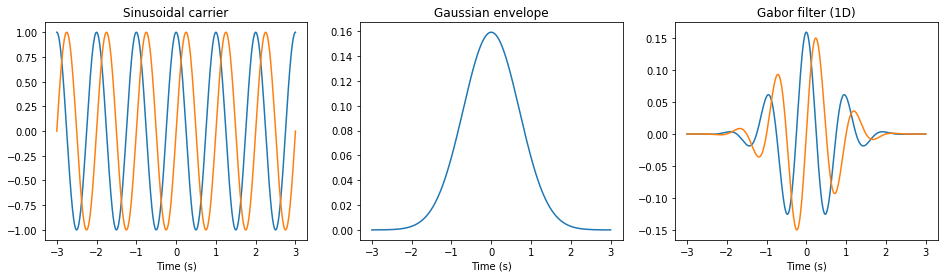

In [5]:
import matplotlib.pyplot as plt

myfig = plt.figure(figsize=(16,4))
t_inputs = np.linspace(-3,3,500)

ax_carrier = myfig.add_subplot(1,3,1)
plt.title("Sinusoidal carrier")
plt.xlabel("Time (s)")
ax_envelope = myfig.add_subplot(1,3,2)
plt.title("Gaussian envelope")
plt.xlabel("Time (s)")
ax_filter = myfig.add_subplot(1,3,3)
plt.title("Gabor filter (1D)")
plt.xlabel("Time (s)")

ax_carrier.plot(t_inputs, G_carrier_real(t=t_inputs, freq=myparas["freq"], phase=myparas["phase"]))
ax_carrier.plot(t_inputs, G_carrier_imag(t=t_inputs, freq=myparas["freq"], phase=myparas["phase"]))

ax_envelope.plot(t_inputs, G_envelope(t=t_inputs, amp=myparas["amp"], sdev=myparas["sdev"]))

ax_filter.plot(t_inputs, G_fil_real(t=t_inputs, paras=myparas))
ax_filter.plot(t_inputs, G_fil_imag(t=t_inputs, paras=myparas))

plt.show()

__Exercises:__

0. Look at the `freq` parameter and the left-most plot above. Are the number of cycles per unit of time what you expect? Modify `freq` to values such as 1, 4, 0.5, and 0.25, observing what happens each time.

0. Change `sdev` to values such as 0.25 and 2, observing the impact. If necessary, adjust the range of `t_inputs` to get a better view.

0. Modify the `phase` parameter of just the imaginary part, such that it coincides with the real part (they are out of phase by $90^{\circ}$, or $\pi/2$ radians).

___

<a id="1Dapp"></a>
## Application of 1D filter

Now that we've looked at this filter, let's consider what it means to *apply* this filter. Let's construct an artificial signal to explore this.


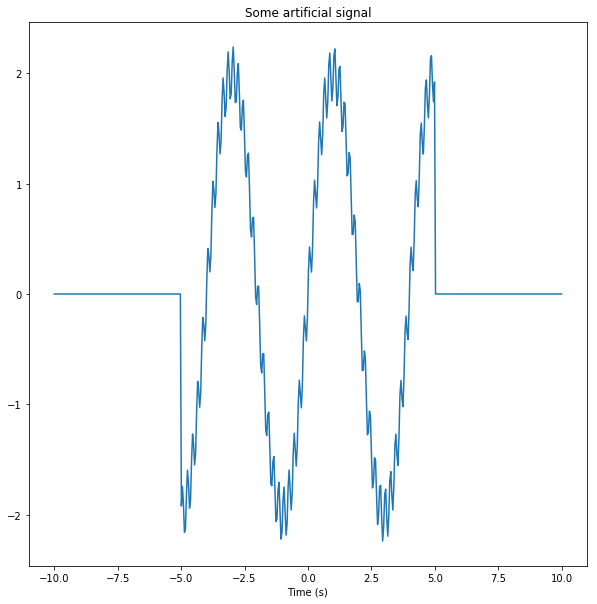

In [6]:

para_HIGHFREQ = 5
para_LOWFREQ = 0.25

def my_signal(t):
    
    highfreq = 0.25 * np.sin((2*math.pi*para_HIGHFREQ*t))
    lowfreq = 2 * np.sin((2*math.pi*para_LOWFREQ*t))
    
    cond = (np.abs(t) <= 5)
    signal = highfreq + lowfreq
    out = np.select([cond], [signal])
    
    return out


myfig = plt.figure(figsize=(10,10))
t_inputs = np.linspace(-10, 10, 500)

plt.plot(t_inputs, my_signal(t=t_inputs))
plt.title("Some artificial signal")
plt.xlabel("Time (s)")
plt.show()

Now, to "apply" a filter typically means to take the *convolution* of a filter and some input signal. This can be interpreted as a new signal (a function of time), and the most natural filter response.

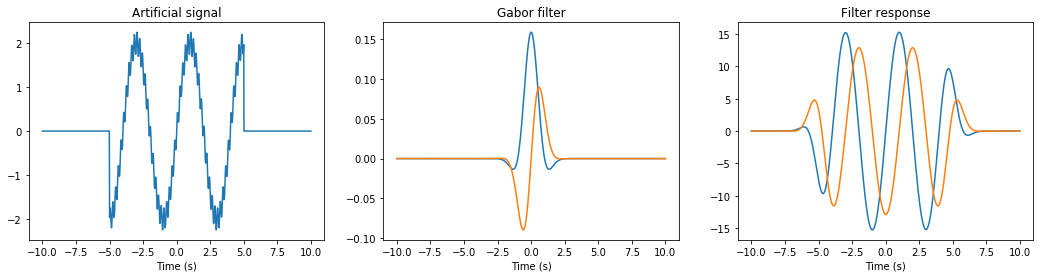

In [7]:
from scipy import signal

t_inputs = np.linspace(-10, 10, 1000)
sig_values = my_signal(t=t_inputs)

myparas = {"amp": 1/(2*math.pi),
           "sdev": 1,
           "freq": 0.25,
           "phase": 0}
fil_values_real = G_fil_real(t=t_inputs, paras=myparas)
fil_values_imag = G_fil_imag(t=t_inputs, paras=myparas)
fil_response_real = signal.convolve(sig_values, fil_values_real, mode="same")
fil_response_imag = signal.convolve(sig_values, fil_values_imag, mode="same")

myfig = plt.figure(figsize=(18,4))

ax_signal = myfig.add_subplot(1,3,1)
plt.title("Artificial signal")
plt.xlabel("Time (s)")
ax_filter = myfig.add_subplot(1,3,2)
plt.title("Gabor filter")
plt.xlabel("Time (s)")
ax_response = myfig.add_subplot(1,3,3)
plt.title("Filter response")
plt.xlabel("Time (s)")

ax_signal.plot(t_inputs, sig_values)

ax_filter.plot(t_inputs, fil_values_real)
ax_filter.plot(t_inputs, fil_values_imag)

ax_response.plot(t_inputs, fil_response_real)
ax_response.plot(t_inputs, fil_response_imag)

plt.show()


__Exercises:__

0. Using the above code, try numerous different values for the `freq` parameter stored in `myparas`, ranging between `para_LOWFREQ` and `para_HIGHFREQ`. Note how the filter better "picks up" the low-frequency and high-frequency components of our artificial signal as its `freq` parameter moves closer to `para_LOWFREQ` and `para_HIGHFREQ` respectively. Prepare and save some labeled plots that illustrate this.

0. Play with the phase and standard deviation parameters as well, and describe how their modification impacts the effect of the filter.

0. Modify the `my_signal` function such that it has low/med/high frequency components (linear combination of three periodic functions with distinct angular frequencies), and confirm that constructing a Gabor filter with the appropriate `freq` parameter for each can indeed extract each of the desired underlying component functions.

The key take-away from this simple one-dimensional exercise is that by preparing different filters specified by different parameters, we can extract different __features__ of the underlying signal. This basic principles extends directly to the multidimensional setting we will consider next.

___

<a id="2Dbg"></a>
## Two-dimensional Gabor filters

Now that we have grasped the basic idea of what a Gabor filter (and many other filters, in fact) can do, let us consider a more general version of the filter. The basic form, we repeat from above, is

\begin{align*}
(\text{Filter output}) = (\text{Sinusoid carrier}) \times (\text{Gaussian envelope})
\end{align*}

just as seen in our concrete look at the one-dimensional version. For 2D however, the domain extends from "the line" to "the plane", and instead of passing $t \in \mathbb{R}$ to the filter, we pass $(x,y) \in \mathbb{R}^{2}$, namely __spatial__ coordinates. Formally, we update our notation as

\begin{align*}
G(x,y) = f(x,y) \, s(x,y)
\end{align*}

where

\begin{align*}
s(x,y) & = \exp \left(i (2\pi (ux + vy) + \phi) \right)\\
 & = \cos(2\pi (ux + vy) + \phi) + i\sin(2\pi (ux + vy) + \phi)\\
f(x,y) & = A \exp\left( -\frac{x^2 + y^2}{\sigma^2} \right).
\end{align*}

As a convention we follow, let the angular frequencies $u$ and $v$ be specified in polar coordinates, as

\begin{align*}
u & = \omega \cos(\theta) \\
v & = \omega \sin(\theta)
\end{align*}

where $\omega$ (spatial frequency) and $\theta$ (filter orientation) are new parameters here. An explanation of the parameters in the filter definition is as follows:

- $u$ and $v$: frequency, typically in the "horizontal" and "vertical" directions of an *image*, namely an array of pixels identified with discrete positions, in which case the frequency parameter specifies the number of cycles the sinusoid makes per pixel.
- $A$: amplitude, as above.
- $\phi$: phase, as above.
- $\sigma$: as above; note that our formulation implies a *circular* Gaussian. An *elliptical* form can be constructed by replacing the summands $(x/\sigma)^2$ and $(y/\sigma)^2$ by say $(x/\sigma_{X})^2$ and $(y/\sigma_{Y})^2$ where $\sigma_{X}$ and $\sigma_{Y}$ determine the size of the major/minor axes.

That's enough for the equations here as well. Let's define our own functions and visualize them to get a better grasp on things here.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt


def G2_carrier_real(x, y, freqx, freqy, phase):
    '''
    Real part of the 2-D Gabor carrier.
    '''
    topass = 2 * math.pi * (freqx*x + freqy*y) + phase
    out = np.cos(topass)
    return out


def G2_carrier_imag(x, y, freqx, freqy, phase):
    '''
    Imaginary part of the 2-D Gabor carrier.
    '''
    topass = 2 * math.pi * (freqx*x + freqy*y) + phase
    out = np.sin(topass)
    return out


def G2_envelope(x, y, amp, sdev):
    '''
    Gaussian envelope for a 2-D Gabor filter.
    We assume that it is circular (same rate of decrease in x/y directions).
    '''
    out = amp * np.exp(-(x**2+y**2)/(sdev**2))
    return out


As with the one-dimensional case, the filter can be specified by a small handful of parameters.

In [5]:

PIX_W = 128 # image width, in pixels
PIX_H = 128 # image height, in pixels
max_cycles = 4 # the maximum cycles per image.
myparas = {"freqs": max_cycles/max(PIX_W,PIX_H), # cycles per pixel
           "dir": math.pi/2, # orientation
           "amp": 1,
           "sdev": max(PIX_W,PIX_H)/5,
           "phase": 0}


Note here `freqs` refers to __s__patial __freq__uency $\omega$ as introduced above. These parameters are then used to build a customized filter.

In [6]:

def G2_fil_real(x, y, paras):
    '''
    Custom-built filter response (real part).
    '''
    # Spatial frequency in polar coordinates.
    u = paras["freqs"] * math.cos(paras["dir"])
    v = paras["freqs"] * math.sin(paras["dir"])
    # Computations.
    carrier = G2_carrier_real(x=x, y=y, freqx=u, freqy=v, phase=paras["phase"])
    envelope = G2_envelope(x=x, y=y, amp=paras["amp"], sdev=paras["sdev"])
    out = carrier * envelope
    return out

def G2_fil_imag(x, y, paras):
    '''
    Custom-built filter response (imaginary part).
    '''
    # Spatial frequency in polar coordinates.
    u = paras["freqs"] * math.cos(paras["dir"])
    v = paras["freqs"] * math.sin(paras["dir"])
    # Computations.
    carrier = G2_carrier_imag(x=x, y=y, freqx=u, freqy=v, phase=paras["phase"])
    envelope = G2_envelope(x=x, y=y, amp=paras["amp"], sdev=paras["sdev"])
    out = carrier * envelope
    return out


Moving ahead, let's look at the graphs of these functions as a simple example to start with.

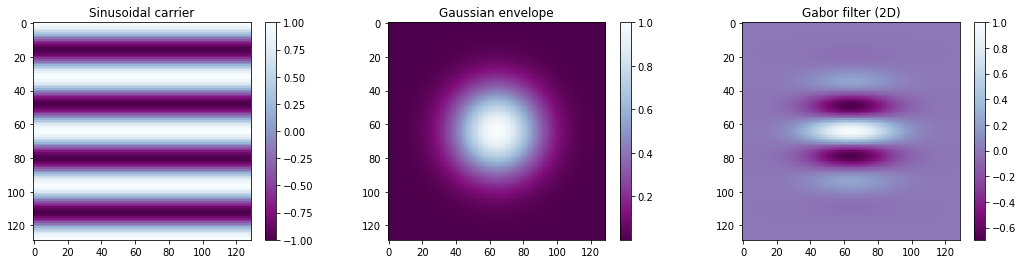

In [7]:

myfig = plt.figure(figsize=(18,4))

y0 = math.floor(PIX_H/2)
x0 = math.floor(PIX_W/2)
y_inputs, x_inputs = np.mgrid[-y0:(y0+1), -x0:(x0+1)]

# Store pixel values (of envelope, carrier, filter) for plotting via imshow.
out_envelope = G2_envelope(x=x_inputs, y=y_inputs,
                             amp=myparas["amp"],
                             sdev=myparas["sdev"])
out_carrier = G2_carrier_real(x=x_inputs,
                              y=y_inputs,
                              freqx=myparas["freqs"]*math.cos(myparas["dir"]),
                              freqy=myparas["freqs"]*math.sin(myparas["dir"]),
                              phase=myparas["phase"])
out_filter = G2_fil_real(x=x_inputs, y=y_inputs, paras=myparas)


ax_carrier = myfig.add_subplot(1,3,1)
plt.title("Sinusoidal carrier")
topass = ax_carrier.imshow(out_carrier, cmap=plt.cm.BuPu_r)
plt.colorbar(topass)

ax_envelope = myfig.add_subplot(1,3,2)
plt.title("Gaussian envelope")
topass = ax_envelope.imshow(out_envelope, cmap=plt.cm.BuPu_r)
plt.colorbar(topass)

ax_filter = myfig.add_subplot(1,3,3)
plt.title("Gabor filter (2D)")
topass = ax_filter.imshow(out_filter, cmap=plt.cm.BuPu_r)
plt.colorbar(topass)

plt.show()


The 2D spatial filter implemented above is a direct extension of the 1D temporal filter implemented previously, and has completely analogous parameters, as one can confirm in the exercises below.

__Exercises:__

0. Modify the `dir` parameter (corresponding to orientation parameter $\theta$), setting it to zero, $\pi/4$, $\pi/2$, and so on. Describe the qualitative changes in the filter output.

0. Modify the `freqs` parameter and note the number of cycles over the full image. Set `dir` and `freqs` such that the sinusoid only depends on the horizontal position (i.e., the leftmost plot looks like alternating vertical bars), and the number of cycles in the horizontal direction over the full image is five. Repeat, but with 10 cycles. Repeat once again for 25 cycles.

0. Replace the real part (`carrier_real` and `G2_fil_real`) with the imaginary part in the above code. Qualitatively, what change has taken place with respect to the effect of the filter?

0. Modify the standard deviation parameter such that its visible radius is approximately *half* the width/height of the domain pictured. Repeat, making it approximately a quarter. Again, one eighth.

___

<a id="2Dapp"></a>
## Application of 2D filter

Now it comes time to *apply* the filters to signals, now defined on the plane rather than the line. In this sense, the pixel values of an image are considered to be the values taken by a signal defined on the plane (thus we call them "2D").

We begin with reading and writing images from file. A standard library for doing this is __imageio__ (http://imageio.github.io/). Assuming all the image files have been saved locally in advance, the following example shows how easy it is to visualize the content of image files using objects from this library.

Shape: (300, 451, 3) Type: <class 'imageio.core.util.Image'> First value (r,g,b): [143 120 104]
Shape: (128, 128, 3) Type: <class 'imageio.core.util.Image'> First value (r,g,b): [180 116  33]
Shape: (633, 801, 3) Type: <class 'imageio.core.util.Image'> First value (r,g,b): [168 165 160]


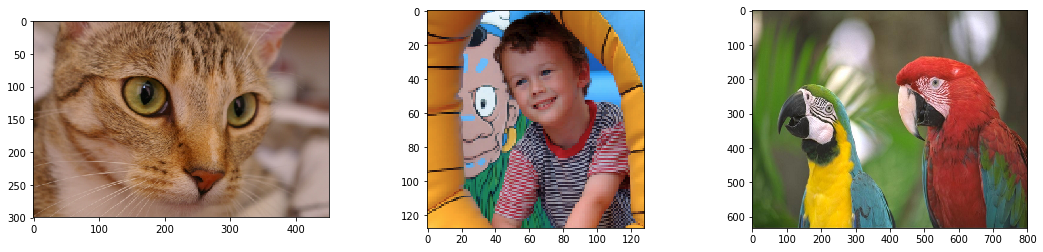

In [12]:
import imageio

# Read images from file.
im_cat = imageio.imread("img/chelsea.png")
im_boy = imageio.imread("img/bishop.png")
im_parrots = imageio.imread("img/parrots.png")

# Inspect (and plot) the images to ensure they have been read as we expect.
print("Shape:", im_cat.shape, "Type:", type(im_cat), "First value (r,g,b):", im_cat[0,0,:])
print("Shape:", im_boy.shape, "Type:", type(im_boy), "First value (r,g,b):", im_boy[0,0,:])
print("Shape:", im_parrots.shape, "Type:", type(im_parrots), "First value (r,g,b):", im_parrots[0,0,:])

myfig = plt.figure(figsize=(18,4))
ax_cat = myfig.add_subplot(1,3,1)
ax_boy = myfig.add_subplot(1,3,2)
ax_parrots = myfig.add_subplot(1,3,3)
ax_cat.imshow(im_cat)
ax_boy.imshow(im_boy)
ax_parrots.imshow(im_parrots)

plt.show()


Note that the imageio library provides its own image objects (not typical `ndarray` objects), which are plotted as we would hope (all three channels are used).

Let's take a look at individual channels from a single image.

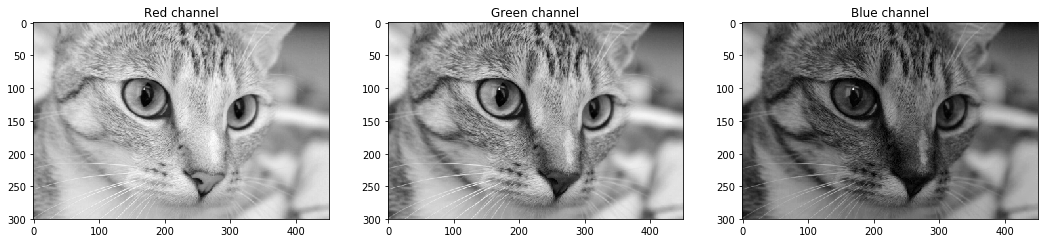

In [13]:

im = imageio.imread("img/chelsea.png")

myfig = plt.figure(figsize=(18,4))
ax_R = myfig.add_subplot(1,3,1)
plt.title("Red channel")
ax_G = myfig.add_subplot(1,3,2)
plt.title("Green channel")
ax_B = myfig.add_subplot(1,3,3)
plt.title("Blue channel")

ax_R.imshow(im[:,:,0], plt.get_cmap('gray'))
ax_G.imshow(im[:,:,1], cmap=plt.get_cmap('gray'))
ax_B.imshow(im[:,:,2], cmap=plt.get_cmap('gray'))
plt.show()


Or to emphasize the colours a bit more, we can change the colour maps.

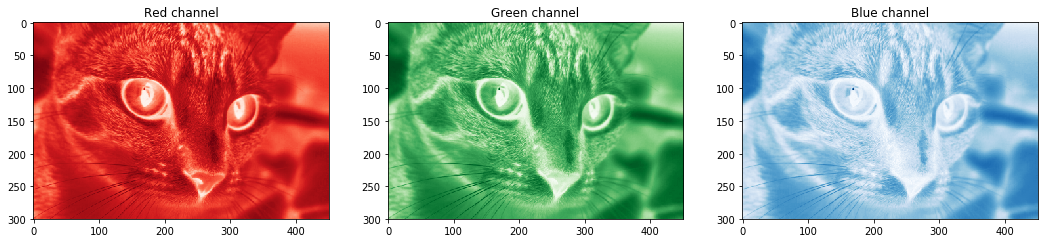

In [14]:

myfig = plt.figure(figsize=(18,4))
ax_R = myfig.add_subplot(1,3,1)
plt.title("Red channel")
ax_G = myfig.add_subplot(1,3,2)
plt.title("Green channel")
ax_B = myfig.add_subplot(1,3,3)
plt.title("Blue channel")

ax_R.imshow(im[:,:,0], cmap=plt.cm.Reds)
ax_G.imshow(im[:,:,1], cmap=plt.cm.Greens)
ax_B.imshow(im[:,:,2], cmap=plt.cm.Blues)
plt.show()



Following Nishimoto et al. (2011), we convert the RGB colour image into the CIE L\*a\*b\* colour space, and then keep only the "L" values, namely *luminance*. To do this, the __scikit-image__ (http://scikit-image.org/) library provides useful functions; in particular, we shall use the *color* module, as below.


In [15]:
from skimage import color as col

# Re-read the original image from file.
im = imageio.imread("img/chelsea.png")
im_xyz = col.rgb2xyz(im) # convert from RGB to XYZ colour space
im_cielab = col.xyz2lab(im_xyz) # convert from XYZ to CIE L*a*b* colour space.

print("RGB:")
print("Shape:", im.shape, "Type:", type(im), "First value (L*,a*,b*):", im[0,0,:])
print("XYZ:")
print("Shape:", im_xyz.shape, "Type:", type(im_xyz), "First value (X,Y,Z):", im_xyz[0,0,:])
print("L*a*b*:")
print("Shape:", im_cielab.shape, "Type:", type(im_cielab), "First value (L*,a*,b*):", im_cielab[0,0,:])


RGB:
Shape: (300, 451, 3) Type: <class 'imageio.core.util.Image'> First value (L*,a*,b*): [143 120 104]
XYZ:
Shape: (300, 451, 3) Type: <class 'numpy.ndarray'> First value (X,Y,Z): [0.20542868 0.20272827 0.15923899]
L*a*b*:
Shape: (300, 451, 3) Type: <class 'numpy.ndarray'> First value (L*,a*,b*): [52.14428353  6.33656553 12.11784839]


Note that the output of these colour space conversions takes the form of the familiar *ndarray* of numpy. Let us now extract the "lightness" or "luminance" information and discard the colour information from the CIE-L\*a\*b\* representation, and compare it with a typical "grayscale" image made of non-uniform linear combination of pixel values from RGB channels.

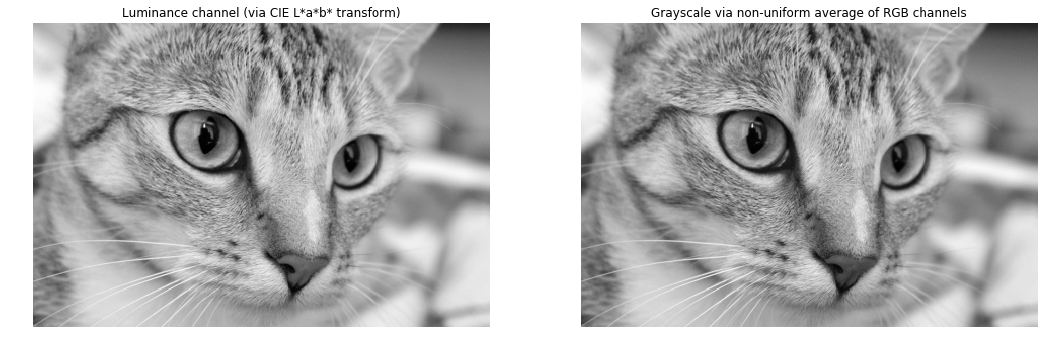

In [16]:

im_L = im_cielab[:,:,0] # the luminance channel of CIE-Lab.
im_gs = col.rgb2gray(im) # the "luminance" by a non-uniform weighted ave of RGB.

myfig = plt.figure(figsize=(18,9))
ax_L = myfig.add_subplot(1,2,1)
plt.title("Luminance channel (via CIE L*a*b* transform)")
plt.axis("off")
ax_gs = myfig.add_subplot(1,2,2)
plt.title("Grayscale via non-uniform average of RGB channels")
plt.axis("off")
ax_L.imshow(im_L, cmap=plt.get_cmap('gray'))
ax_gs.imshow(im_gs, cmap=plt.get_cmap('gray'))

plt.show()


While subtle, note that the two images are indeed distinct, and that by carrying out this transformation, instead of a three-dimensional image object, we end up with a 2D array (of *ndarray* type) that will be the signal to which we apply our 2D Gabor filters.

__Exercises:__

0. Re-run the above steps for the other "stock" images we have prepared in the `img` directory. In addition to the cat (`chelsea.png`), there is also the boy (`bishop.png`) and the parrots (`parrots.png`). Just as above, separate and visualize the three colour channels of the RGB image, then make the conversion to CIE-L\*a\*b\* space, and compare the luminosity channel with the off-the-shelf grayscale output. Save these images to file using `imwrite` (the counterpart to `imread`).

0. Compare the luminosity and grayscale forms of the three original images with others using different hardware; do the images (both luminance and grayscale) appear largely the same across hardware (different monitor types, etc.)? If there are differences for either or both of these, attempt to describe them.

___

Just as in the one-dimensional case, we shall use the convolution operation on two signals (the input signal and our filter) to produce a new signal, which shall form the Gabor filter response. The only difference here is that the domain is the real plane rather than the real line. Convolution is an extremely computationally intensive procedure, and making use of standard libraries is recommended. We use the __ndimage__ module from __scipy__, in particular the `convolve` function (see https://docs.scipy.org/doc/scipy/reference/ndimage.html). This function has two main arguments:

 - `input`: an `ndarray` object that will be our input signal, usually a particular digital image or individual frames of a movie.
 - `weights`: an `ndarray` object that contains the values of our 2D Gabor filter.

Let's write up a function to generate a "kernel" of weights for use in convolutions. Typically the kernel array will be much smaller than the images we convolve them with.

In [17]:

def fil_kernel(paras, n_stds=3):
    '''
    Complex values of 2D Gabor filter, for use in convolution.
    When applied to images, this is typically called
    The linear size of the filter is determined as a multiple
    of the standard deviation of the Gaussian envelope, and the
    values passed to the filter are symmetric about zero.
    
    USAGE: pass the parameters only; the size of the grid of
    response values generated depends on these.
    '''
    
    pixnum = 2*math.ceil(n_stds*paras["sdev"])
    
    y0 = pixnum/2
    x0 = pixnum/2
    y, x = np.mgrid[-y0:(y0+1), -x0:(x0+1)]
    
    # Spatial frequency in polar coordinates.
    u = paras["freqs"] * math.cos(paras["dir"])
    v = paras["freqs"] * math.sin(paras["dir"])
    # Computations.
    envelope = G2_envelope(x=x, y=y,
                           amp=paras["amp"]/(2*math.pi*paras["sdev"]**2),
                           sdev=paras["sdev"])
    out = {"real": None, "imag": None}
    out["real"] = envelope * G2_carrier_real(x=x, y=y, freqx=u, freqy=v, phase=paras["phase"])
    out["imag"] = envelope * G2_carrier_imag(x=x, y=y, freqx=u, freqy=v, phase=paras["phase"])
    
    return out


Let's compare the output of our kernel (namely, our 2D Gabor filter) and that of the Gabor filter implemented in the scikit-image `filters` module (http://scikit-image.org/docs/dev/api/skimage.filters.html). 

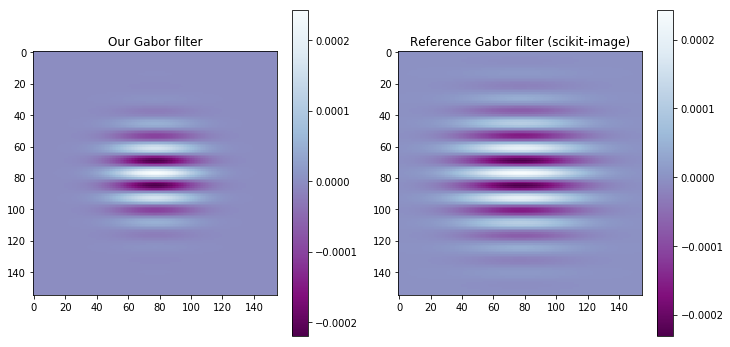

In [18]:
from skimage import filters as skfil

myparas = {"freqs": 8/max(PIX_W,PIX_H),
           "dir": math.pi/2,
           "amp": 1,
           "sdev": max(PIX_W,PIX_H)/5,
           "phase": 0}

ours = fil_kernel(paras=myparas, n_stds=3)

theirs = skfil.gabor_kernel(frequency=myparas["freqs"],
                            theta=myparas["dir"],
                            bandwidth=1,
                            sigma_x=myparas["sdev"],
                            sigma_y=myparas["sdev"],
                            n_stds=3,
                            offset=0)

myfig = plt.figure(figsize=(12,6))

ax_ours = myfig.add_subplot(1,2,1)
plt.title("Our Gabor filter")
topass = ax_ours.imshow(ours["real"], cmap=plt.cm.BuPu_r)
plt.colorbar(topass)

ax_theirs = myfig.add_subplot(1,2,2)
plt.title("Reference Gabor filter (scikit-image)")
topass = ax_theirs.imshow(theirs.real, cmap=plt.cm.BuPu_r)
plt.colorbar(topass)

plt.show()


While there is no need to match up our filter with this standard one (the filter implementation is quite arbitrary), clearly they are similar, and with appropriate parameter tuning they can be closely aligned. In any case, we shall be using ours.

With a kernel of weights to pass to the convolution routine, we are ready to execute this routine.

In [19]:
from scipy import ndimage as ndi

im = imageio.imread("img/chelsea.png")
im_L = col.xyz2lab(col.rgb2xyz(im))[:,:,0]
PIX_H = im_L.shape[0]
PIX_W = im_L.shape[1]

myparas = {"freqs": 32/max(PIX_W,PIX_H),
           "dir": math.pi/2,
           "amp": 0.1,
           "sdev": max(PIX_W,PIX_H)/20,
           "phase": 0}
mymode = "reflect"
mycval = 0

fil_values = fil_kernel(paras=myparas, n_stds=3)

print("Convolving w/ real part (takes time)...", end=" ")
fil_response_real = ndi.convolve(input=im_L, weights=fil_values["real"], mode=mymode, cval=mycval)
print("OK.")
print("Convolving w/ imaginary part (takes time)...", end=" ")
fil_response_imag = ndi.convolve(input=im_L, weights=fil_values["imag"], mode=mymode, cval=mycval)
print("OK.")



Convolving w/ real part (takes time)... OK.
Convolving w/ imaginary part (takes time)... OK.


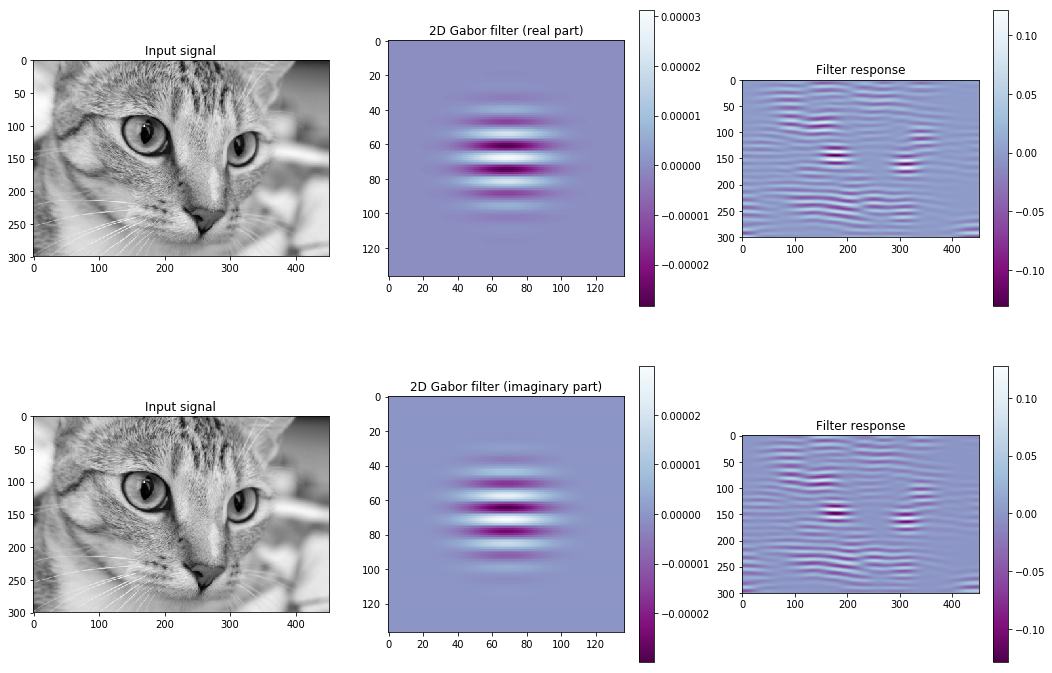

In [20]:

myfig = plt.figure(figsize=(18,12))

ax_signal = myfig.add_subplot(2,3,1)
plt.title("Input signal")
ax_signal.imshow(im_L, cmap=plt.get_cmap('gray'))

ax_filter = myfig.add_subplot(2,3,2)
plt.title("2D Gabor filter (real part)")
topass = ax_filter.imshow(fil_values["real"], cmap=plt.cm.BuPu_r)
plt.colorbar(topass)

ax_response = myfig.add_subplot(2,3,3)
plt.title("Filter response")
topass = ax_response.imshow(fil_response_real, cmap=plt.cm.BuPu_r)
plt.colorbar(topass)

ax_signal = myfig.add_subplot(2,3,4)
plt.title("Input signal")
ax_signal.imshow(im_L, cmap=plt.get_cmap('gray'))

ax_filter = myfig.add_subplot(2,3,5)
plt.title("2D Gabor filter (imaginary part)")
topass = ax_filter.imshow(fil_values["imag"], cmap=plt.cm.BuPu_r)
plt.colorbar(topass)

ax_response = myfig.add_subplot(2,3,6)
plt.title("Filter response")
topass = ax_response.imshow(fil_response_imag, cmap=plt.cm.BuPu_r)
plt.colorbar(topass)

plt.show()


Based on the convolution above, we shall construct features as follows. Using every pixel of both the real and imaginary parts is neither necessary nor practical. Given an image $I$ (mapping $(x,y) \mapsto I(x,y) \in \mathbb{R}$ pixel values) and our Gabor filter (mapping $(x,y) \mapsto F(x,y) \in \mathbb{C}$ filter values), in our computations thus far we have acquired the raw filter response $\widetilde{I}$, defined on the plane as

\begin{align*}
\widetilde{I}(x,y) = (I \ast F)(x,y) \in \mathbb{C}, \quad (x,y) \in \mathbb{R}^{2}
\end{align*}

Our features will be derived from the *magnitude* of the complex filter response, namely $|\widetilde{I}(x,y)|$, where $|z| = \sqrt{\text{Re}(z)^{2} + \text{Im}(z)^{2}}$. This is computed and visualized below.

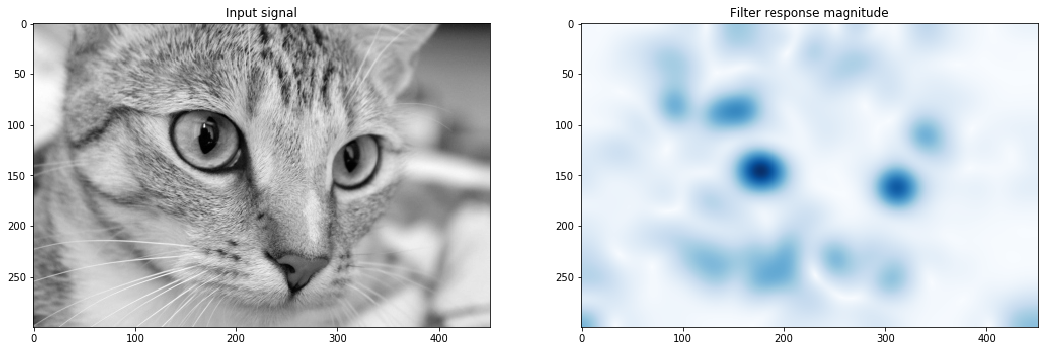

In [21]:

# Magnitude of the complex filter response.
fil_response_magnitude = np.sqrt((fil_response_real**2+fil_response_imag**2))

myfig = plt.figure(figsize=(18,12))

ax_signal = myfig.add_subplot(1,2,1)
plt.title("Input signal")
ax_signal.imshow(im_L, cmap=plt.get_cmap('gray'))

ax_filter = myfig.add_subplot(1,2,2)
plt.title("Filter response magnitude")
ax_filter.imshow(fil_response_magnitude, cmap=plt.cm.Blues)

plt.show()


__Exercises:__

0. Explore how filter parameters impact the result of the response after convolution. In particular, what kind of role does each of `dir`, `freqs`, `stdev`, and `n_stds` play? Try extreme values of each, and describe the consequences.

0. As a follow-up to the previous exercise, repeat your investigation of the role of each parameter for each of the stock images (`chelsea.png`, `bishop.png`, `parrots.png`). In order to "pick up" relevant features, do you need to have rather different filter settings from image to image?

An important point should be reinforced here: in general, the learning machine will not (and indeed cannot) know the precise content of the images it will be presented with ahead of time. You have observed that different filter settings lead to high/low sensitivity, depending on the image contents. This implies that in order to have a model of this form that can capture a wide variety of image features for arbitrary images, a large variety of hand-built filters will be required.

___

Using this large array of pixels can be unwieldy, so we shall take sub-patches of the image, and compute statistics of the magnitude values computed within each distinct patch. A bit more formally, if we partition the image $I$ into disjoint patches, say $\{I_{1},\ldots,I_{k}\}$ (all functions), then a natural response for the $i$th patch will be $\widetilde{r}_{i}$ defined as

\begin{align*}
\widetilde{r}_{i} = \frac{1}{|\text{dom}(I_{i})|} \sum_{(a,b) \in \text{dom}(I_{i})} |I_{i}(a,b)|,
\end{align*}

and so on for all $i=1,\ldots,k$. Note that in addition to the sample mean of each patch, the median, max, min, and other statistics can also be considered. With this initial response $\widetilde{r}_{i}$ in hand, we pass it through a non-linear compression function to get the final response, defined

\begin{align*}
r_{i} = \log(1+\widetilde{r}_{i}).
\end{align*}

These two final steps are implemented as follows.

In [22]:

def patch_stats(image, grid_w, grid_h):
    '''
    A simple function which takes an image, divides it
    into a (grid_y x grid_x) grid of patches, and iterates
    over the patches, computing per-patch statistics.
    
    In the special case of grid_x=grid_y=1, stats are for the whole image.
    '''
    
    pix_h = image.shape[0] # number of pixels
    pix_w = image.shape[1]
    
    gridsize = grid_w*grid_h
    
    dh = math.floor(pix_h/grid_h) # typical (non-edge) patch sizes
    dw = math.floor(pix_w/grid_w)
    
    meanvec = np.zeros(gridsize, dtype=np.float32) # initialize vectors to hold the stats
    medvec = np.zeros(gridsize, dtype=np.float32)
    maxvec = np.zeros(gridsize, dtype=np.float32)
    minvec = np.zeros(gridsize, dtype=np.float32)
    
    # Loop over the patches, starting at the top-left, and doing one grid row at a time.
    idx = 0
    for i in range(grid_h):
        
        start_h = i * dh
        if (i+1 == grid_h):
            stop_h = pix_h
        else:
            stop_h = start_h + dh
        
        for j in range(grid_w):
            
            start_w = j * dw
            if (j+1 == grid_w):
                stop_w = pix_w
            else:
                stop_w = start_w + dw
            
            patch = image[start_h:stop_h, start_w:stop_w]
            meanvec[idx] = np.mean(patch) # patch mean
            medvec[idx] = np.median(patch) # patch median
            maxvec[idx] = np.max(patch) # patch maximum
            minvec[idx] = np.min(patch) # patch minimum
            idx += 1
    
    return {"mean": meanvec, "med": medvec, "max": maxvec, "min": minvec}


def nonlin(u):
    '''
    A non-linear function to pass per-patch magnitude statistics through.
    '''
    return np.log(1+u)


Here we have:

 - `patch_stats`: takes the desired grid size, and loops over each patch, computing the desired statistics.
 
 - `nonlin`: the final non-linear compressive mapping, whose returned value will be used as a final feature value for our prediction tasks later.

Let's test that the per-patch statistics are indeed taking the sorts of values we expect.

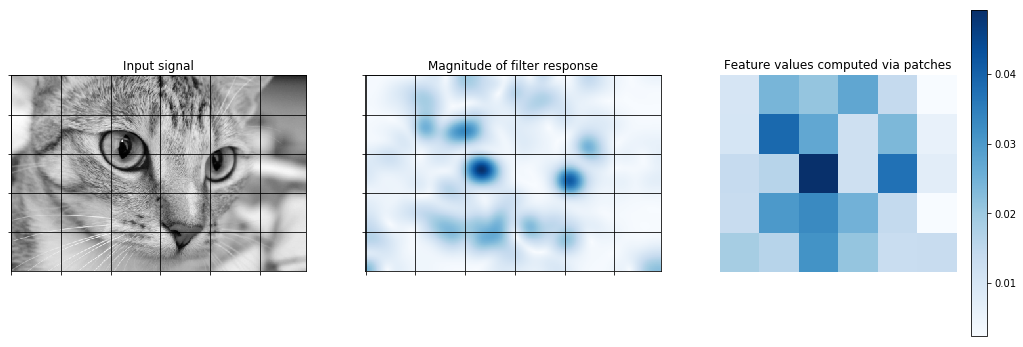

In [23]:
mygrid_h = 5
mygrid_w = 6

# Compute per-patch statistics.
mystats = patch_stats(image=fil_response_magnitude,
                      grid_h=mygrid_h, grid_w=mygrid_w)

# Pass the per-patch magnitude statistics through a non-linear function,
# and arrange into a matrix such that correspondence between feature
# values and sub-regions of the image is clear.
features = nonlin(mystats["mean"]).reshape((mygrid_h,mygrid_w))

myfig = plt.figure(figsize=(18,6))

ax_signal = myfig.add_subplot(1,3,1)
plt.title("Input signal")
ax_signal.set_xticks(np.arange(0, PIX_W, math.ceil(PIX_W/mygrid_w)))
ax_signal.set_yticks(np.arange(0, PIX_H, math.ceil(PIX_H/mygrid_h)))
ax_signal.grid(linestyle="-", color='black')
ax_signal.set_yticklabels([])
ax_signal.set_xticklabels([])
ax_signal.imshow(im_L, cmap=plt.get_cmap('gray'))

ax_filter = myfig.add_subplot(1,3,2)
plt.title("Magnitude of filter response")
ax_filter.set_xticks(np.arange(0, PIX_W, math.ceil(PIX_W/mygrid_w)))
ax_filter.set_yticks(np.arange(0, PIX_H, math.ceil(PIX_H/mygrid_h)))
ax_filter.grid(linestyle="-", color='black')
ax_filter.set_yticklabels([])
ax_filter.set_xticklabels([])
ax_filter.imshow(fil_response_magnitude, cmap=plt.cm.Blues)

ax_features = myfig.add_subplot(1,3,3)
plt.title("Feature values computed via patches")
topass = ax_features.imshow(features, cmap=plt.cm.Blues)
ax_features.axis("off")
myfig.colorbar(topass)
plt.show()



__Exercises:__

0. Adjust the `sdev` parameter to comparatively large and small values; having done this, how do you think the grid size (via parameters `mygrid_h` and `mygrid_w`) should be adjusted? Try both coarse and fine grids, and comment on how the extracted feature values (right-most plot) change.

0. Repeat the above exercise for all three stock images (`chelsea.png`, `bishop.png`, `parrots.png`), making references to the qualitative differences in the original images.


When we have a large number of digital images or a video with many frames, then it will be worthwhile to define a function that runs through the above feature-selection process in an end to end fashion.

In [24]:

def G2_getfeatures(ims, fil_paras, gridshape, mode="reflect", cval=0):
    '''
    A routine which takes an array of images with 4 coords.
    Dim 1 and 2: pixel position.
    Dim 3: RGB channel index.
    Dim 4: Time index.
    '''
    
    num_ims = ims.shape[3]
    num_feats = gridshape[0] * gridshape[1]
    
    out = np.zeros(num_ims*num_feats, dtype=np.float32).reshape((num_ims,num_feats))
    
    # Generate the kernel prior to loop over images.
    fil_values = fil_kernel(paras=fil_paras, n_stds=2)
    
    # Iterate over images.
    for i in range(num_ims):
        
        featvec = np.arange(0, dtype=np.float32)
        
        # Slice -> XYZ -> CIE Lab -> Take only Luminance channel.
        im = col.xyz2lab(col.rgb2xyz(ims[:,:,:,i]))[:,:,0]
        
        # Convolution.
        fil_response_real = ndi.convolve(input=im,
                                         weights=fil_values["real"],
                                         mode=mode, cval=cval)
        fil_response_imag = ndi.convolve(input=im,
                                         weights=fil_values["imag"],
                                         mode=mode, cval=cval)
        fil_response_magnitude = np.sqrt((fil_response_real**2 + fil_response_imag**2))
        
        # Per-patch statistics.
        imstats = patch_stats(image=fil_response_magnitude, grid_h=gridshape[0], grid_w=gridshape[1])
            
        # Pass per-patch statistics through non-linearity to compute final feature vector.
        imfeats = nonlin(imstats["mean"])
        
        # Store the feature vector for this image.
        out[i,:] = imfeats
    
    # Output is the array of feature vectors, one feature vector for each image.
    return out


__Exercises:__

0. Using the `G2_getfeatures` function multiple times, create a "bank" of filters by creating multiple dictionaries to be passed via the argument `fil_paras`. Feature vectors from each distinct filter (specified by one parameter dict) should be concatenated in order to get one long feature vector for each image as the final output.

0. In addition to modifying filter parameters, experiment with other patch statistics besides the mean (median/max/min are already implemented). How does this impact the final feature values? Which of these statistics seems most useful in practice? Why?


## References:

 - Adelson, Edward H., and James R. Bergen. "Spatiotemporal energy models for the perception of motion." JOSA A 2.2 (1985): 284-299.
 - DeAngelis, Gregory C., Izumi Ohzawa, and R. D. Freeman. "Spatiotemporal organization of simple-cell receptive fields in the cat's striate cortex. I. General characteristics and postnatal development." Journal of neurophysiology 69.4 (1993): 1091-1117.
 - Heeger, David J. "Optical flow using spatiotemporal filters." International journal of computer vision 1.4 (1988): 279-302.
 - Jones, Judson P., and Larry A. Palmer. "An evaluation of the two-dimensional Gabor filter model of simple receptive fields in cat striate cortex." Journal of neurophysiology 58.6 (1987): 1233-1258.
 - Watson, Andrew B., and Albert J. Ahumada. "Model of human visual-motion sensing." JOSA A 2.2 (1985): 322-342.
 - Nishimoto, Shinji, et al. "Reconstructing visual experiences from brain activity evoked by natural movies." Current Biology 21.19 (2011): 1641-1646.
 - Texture classification reference: http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_gabor.html
 - Facial recognition reference: Brain-like Integrated Systems Lab, Department of Human Intelligence Systems, Graduate School of Life Science and Systems Engineering, Kyushu Institute of Technology. URL: http://www.brain.kyutech.ac.jp/~morie/topics/gabor_en.shtml